<a href="https://colab.research.google.com/github/NasiUduk27/quiz-1-machine-learning-ti3f/blob/main/11_DhoriffitoDiansyahPutra_Quiz1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Nama   : Dhoriffito Diansyah Putra
## NIM    : 2141720201
## Kelas  : TI-3F
## Absen  : 11

# Kasus - Klasifikasi Tulisan Tangan dengan Dataset MNIST

## Deskripsi Umum
Anda diminta untuk melakukan klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM untuk merekognisi tulisan tangan dari dataset MNIST

## Tentang Dataset MNIST

Dataset MNIST (Modified National Institute of Standards and Technology) merupakan dataset berupa citra grayscale dengan ukuran 28x28 yang berisi tulisan tangan dari digit angka 0-9. Jumlah data dalam dataset ini adalah 70.000 data.

## Detail Kuis

1. Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!

2. Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat menggunakan referensi dari Job Sheet 03.

3. Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk
    - Langsung menggunakan nilai asli dari citra (nilai asli setiap pixel dari dataset) sebagai fitur.
    - Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda diperbolehkan melakukan ekspolarasi pada proses ini.

4. Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.

4. Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM.
   - Anda diperbolehkan untuk melakukan tunning parameter.
   - Anda diperbolehkan mengeksplorasi jenis kernel yang digunakan pada SVM.

5. Evaluasi model yang Anda buat terhadap data training dan data testing.
   - Gunakan metric *accuracy* untuk mengetahui tingkat akurasi data training dan data testing.
   - Gunakan fungsi *classification_report* untuk mengetahui performa model secara holistik.
   - Gunakan confusion matrix untuk mengetahui tingkat ketepatan pelabelan.

6. Tampilkan citra data testing berserta hasil pelabelannya. Anda dapat menggunakan Job Sheet 03 sebagai acuan.

7. Apa model terbaik yang Anda dapatkan? Bagaimana konfigurasinya? Berapa tingkat akurasi yang didapatkan? Jelaskan!

# Bantuan

Berikut merupakan kode bantuan untuk proses mengunduh dataset MNIST

In [3]:
# Unduh Dataset MNIST
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
# Baca deskripsi dataset
# Tahap ini mungkin diperlukan untuk lebih memahami dataset
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [5]:
# Inspeksi semua key dalam dataset
# Cara ini digunakan untuk memahami struktur dari dataset MNIST
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

1. Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!

Jumlah data untuk label 0: 6903
Jumlah data untuk label 1: 7877
Jumlah data untuk label 2: 6990
Jumlah data untuk label 3: 7141
Jumlah data untuk label 4: 6824
Jumlah data untuk label 5: 6313
Jumlah data untuk label 6: 6876
Jumlah data untuk label 7: 7293
Jumlah data untuk label 8: 6825
Jumlah data untuk label 9: 6958


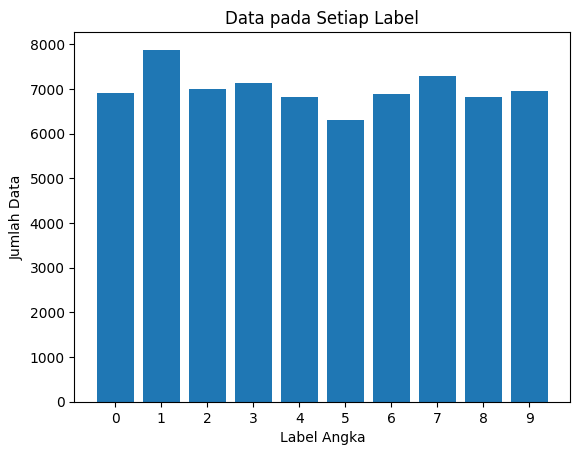

In [6]:
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

X = mnist.data
y = mnist.target

label_counts = np.bincount(y.astype('int'))

for i, count in enumerate(label_counts):
    print(f"Jumlah data untuk label {i}: {count}")

plt.bar(range(10), label_counts)
plt.xlabel('Label Angka')
plt.ylabel('Jumlah Data')
plt.xticks(range(10))
plt.title('Data pada Setiap Label')
plt.show()

Penjelasan :

Data diatas dapat digolongkan menjadi data yang imbalance, tetapi perbedaan selisih antar datanya tidak terlalu signifikan perbedaannya

2. Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya.

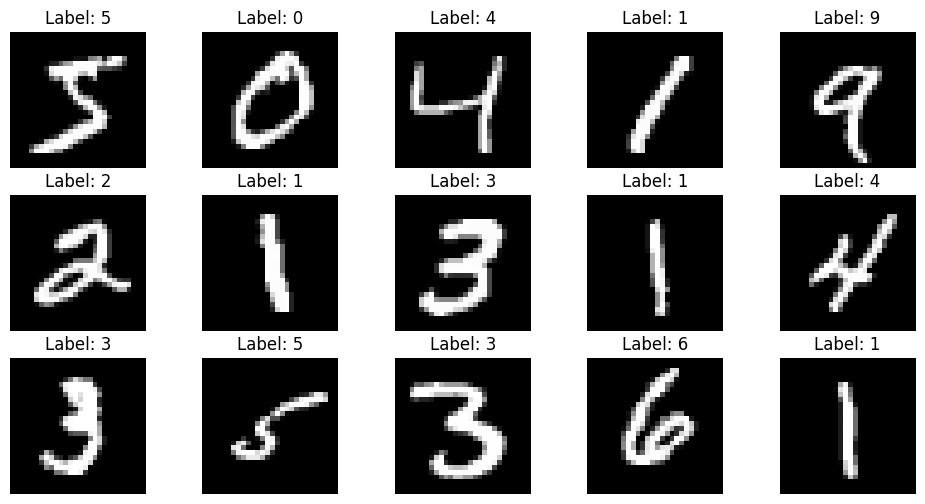

In [7]:
X, y = mnist.data.to_numpy(), mnist.target.astype(int)


plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap="gray")
    plt.title(f"Label: {y[i]}")
    plt.axis("off")
plt.show()

3. ekstraksi fitur pada data MNIST.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
X_pca = pca.fit_transform(X)

Kode diatas menggunakan ekstrasksi dengan PCA. PCA digunakan untuk mengurangi dimensi fitur menjadi 50 komponen utama

4. Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10

In [9]:
from sklearn.model_selection import train_test_split

#(rasio 70:30)
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X, y, test_size=0.3, random_state=42)

#(rasio 80:20)
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X, y, test_size=0.2, random_state=42)

#(rasio 90:10)
X_train_90, X_test_90, y_train_90, y_test_90 = train_test_split(X, y, test_size=0.1, random_state=42)

5. proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM

In [29]:
 # a. SVM

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=120, whiten=True, random_state=70)
svc = svm.SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

param_grid = {'svc__C': [0.1, 0.5, 1, 5, 10, 50], 'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}

X_train_subset = X_train_70[:1000]
y_train_subset = y_train_70[:1000]

grid = GridSearchCV(model, param_grid)
grid.fit(X_train_subset, y_train_subset)

best_params = grid.best_params_
best_score = grid.best_score_

print(best_params)
print(best_score)

model1 = grid.best_estimator_
model2 = grid.best_estimator_
model3 = grid.best_estimator_

model1.fit(X_train_70, y_train_70)
model2.fit(X_train_80, y_train_80)
model3.fit(X_train_90, y_train_90)

yPredTrain1 = model1.predict(X_train_70)
yPredTrain2 = model2.predict(X_train_80)
yPredTrain3 = model3.predict(X_train_90)

yfit1 = model1.predict(X_test_70)
yfit2 = model2.predict(X_test_80)
yfit3 = model3.predict(X_test_90)

{'svc__C': 5, 'svc__gamma': 0.005}
0.8559999999999999


In [13]:
# b. Naive Bayes

from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

gnb = GaussianNB()

modelNB1 = make_pipeline(pca, gnb)
modelNB2 = make_pipeline(pca, gnb)
modelNB3 = make_pipeline(pca, gnb)

modelNB1.fit(X_train_70, y_train_70)
modelNB2.fit(X_train_80, y_train_80)
modelNB3.fit(X_train_90, y_train_90)

yPredTrainNB1 = modelNB1.predict(X_train_70)
yPredTrainNB2 = modelNB2.predict(X_train_80)
yPredTrainNB3 = modelNB3.predict(X_train_90)

yfitNB1 = modelNB1.predict(X_test_70)
yfitNB2 = modelNB2.predict(X_test_80)
yfitNB3 = modelNB3.predict(X_test_90)

6. Evaluasi model yang Anda buat terhadap data training dan data testing.

In [15]:
# untuk Naive Bayes

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Menghitung tingkat akurasi data training
accuracy_train_NB1 = accuracy_score(y_train_70, yPredTrainNB1)
accuracy_train_NB2 = accuracy_score(y_train_80, yPredTrainNB2)
accuracy_train_NB3 = accuracy_score(y_train_90, yPredTrainNB3)

# Menghitung tingkat akurasi data testing
accuracy_test_NB1 = accuracy_score(y_test_70, yfitNB1)
accuracy_test_NB2 = accuracy_score(y_test_80, yfitNB2)
accuracy_test_NB3 = accuracy_score(y_test_90, yfitNB3)

# Menampilkan laporan klasifikasi
classification_report_NB1 = classification_report(y_test_70, yfitNB1)
classification_report_NB2 = classification_report(y_test_80, yfitNB2)
classification_report_NB3 = classification_report(y_test_90, yfitNB3)

# Menampilkan confusion matrix
confusion_matrix_NB1 = confusion_matrix(y_test_70, yfitNB1)
confusion_matrix_NB2 = confusion_matrix(y_test_80, yfitNB2)
confusion_matrix_NB3 = confusion_matrix(y_test_90, yfitNB3)

# Menampilkan hasil
print("Accuracy - Model NB1 (Training):", accuracy_train_NB1)
print("Accuracy - Model NB2 (Training):", accuracy_train_NB2)
print("Accuracy - Model NB3 (Training):", accuracy_train_NB3)
print("Accuracy - Model NB1 (Testing):", accuracy_test_NB1)
print("Accuracy - Model NB2 (Testing):", accuracy_test_NB2)
print("Accuracy - Model NB3 (Testing):", accuracy_test_NB3)

print("\nClassification Report - Model NB1:")
print(classification_report_NB1)
print("\nClassification Report - Model NB2:")
print(classification_report_NB2)
print("\nClassification Report - Model NB3:")
print(classification_report_NB3)

print("\nConfusion Matrix - Model NB1:")
print(confusion_matrix_NB1)
print("\nConfusion Matrix - Model NB2:")
print(confusion_matrix_NB2)
print("\nConfusion Matrix - Model NB3:")
print(confusion_matrix_NB3)

Accuracy - Model NB1 (Training): 0.8645510204081632
Accuracy - Model NB2 (Training): 0.8643035714285714
Accuracy - Model NB3 (Training): 0.8645714285714285
Accuracy - Model NB1 (Testing): 0.8633333333333333
Accuracy - Model NB2 (Testing): 0.8637142857142858
Accuracy - Model NB3 (Testing): 0.8607142857142858

Classification Report - Model NB1:
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      2058
           1       0.98      0.94      0.96      2364
           2       0.72      0.87      0.78      2133
           3       0.83      0.84      0.83      2176
           4       0.87      0.82      0.84      1936
           5       0.79      0.82      0.81      1915
           6       0.94      0.90      0.92      2088
           7       0.92      0.84      0.88      2248
           8       0.84      0.85      0.85      1992
           9       0.82      0.83      0.82      2090

    accuracy                           0.86     21000
   ma

In [18]:
# Untuk SVM

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Melakukan prediksi pada data training dan data testing (70:30)
y_pred_train_SVM_70 = grid.predict(X_train_70)
y_pred_test_SVM_70 = grid.predict(X_test_70)

# Menghitung tingkat akurasi data training (70:30)
accuracy_train_SVM_70 = accuracy_score(y_train_70, y_pred_train_SVM_70)
# Menghitung tingkat akurasi data testing (70:30)
accuracy_test_SVM_70 = accuracy_score(y_test_70, y_pred_test_SVM_70)

# Menampilkan laporan klasifikasi (70:30)
classification_report_SVM_train_70 = classification_report(y_train_70, y_pred_train_SVM_70)
classification_report_SVM_test_70 = classification_report(y_test_70, y_pred_test_SVM_70)

# Menampilkan confusion matrix (70:30)
confusion_matrix_SVM_train_70 = confusion_matrix(y_train_70, y_pred_train_SVM_70)
confusion_matrix_SVM_test_70 = confusion_matrix(y_test_70, y_pred_test_SVM_70)

# Menampilkan hasil (70:30)
print("Accuracy - Model SVM (Training - 70:30):", accuracy_train_SVM_70)
print("Accuracy - Model SVM (Testing - 70:30):", accuracy_test_SVM_70)

print("\nClassification Report - Model SVM (Training - 70:30):")
print(classification_report_SVM_train_70)
print("\nClassification Report - Model SVM (Testing - 70:30):")
print(classification_report_SVM_test_70)

print("\nConfusion Matrix - Model SVM (Training - 70:30):")
print(confusion_matrix_SVM_train_70)
print("\nConfusion Matrix - Model SVM (Testing - 70:30):")
print(confusion_matrix_SVM_test_70)

# Melakukan prediksi pada data training dan data testing (80:20)
y_pred_train_SVM_80 = grid.predict(X_train_80)
y_pred_test_SVM_80 = grid.predict(X_test_80)

# Menghitung tingkat akurasi data training (80:20)
accuracy_train_SVM_80 = accuracy_score(y_train_80, y_pred_train_SVM_80)
# Menghitung tingkat akurasi data testing (80:20)
accuracy_test_SVM_80 = accuracy_score(y_test_80, y_pred_test_SVM_80)

# Menampilkan laporan klasifikasi (80:20)
classification_report_SVM_train_80 = classification_report(y_train_80, y_pred_train_SVM_80)
classification_report_SVM_test_80 = classification_report(y_test_80, y_pred_test_SVM_80)

# Menampilkan confusion matrix (80:20)
confusion_matrix_SVM_train_80 = confusion_matrix(y_train_80, y_pred_train_SVM_80)
confusion_matrix_SVM_test_80 = confusion_matrix(y_test_80, y_pred_test_SVM_80)

# Menampilkan hasil (80:20)
print("\nAccuracy - Model SVM (Training - 80:20):", accuracy_train_SVM_80)
print("Accuracy - Model SVM (Testing - 80:20):", accuracy_test_SVM_80)

print("\nClassification Report - Model SVM (Training - 80:20):")
print(classification_report_SVM_train_80)
print("\nClassification Report - Model SVM (Testing - 80:20):")
print(classification_report_SVM_test_80)

# Melakukan prediksi pada data training dan data testing (90:10)
y_pred_train_SVM_90 = grid.predict(X_train_90)
y_pred_test_SVM_90 = grid.predict(X_test_90)

# Menghitung tingkat akurasi data training (90:10)
accuracy_train_SVM_90 = accuracy_score(y_train_90, y_pred_train_SVM_90)
# Menghitung tingkat akurasi data testing (90:10)
accuracy_test_SVM_90 = accuracy_score(y_test_90, y_pred_test_SVM_90)

# Menampilkan laporan klasifikasi (90:10)
classification_report_SVM_train_90 = classification_report(y_train_90, y_pred_train_SVM_90)
classification_report_SVM_test_90 = classification_report(y_test_90, y_pred_test_SVM_90)

# Menampilkan confusion matrix (90:10)
confusion_matrix_SVM_train_90 = confusion_matrix(y_train_90, y_pred_train_SVM_90)
confusion_matrix_SVM_test_90 = confusion_matrix(y_test_90, y_pred_test_SVM_90)

# Menampilkan hasil (90:10)
print("\nAccuracy - Model SVM (Training - 90:10):", accuracy_train_SVM_90)
print("Accuracy - Model SVM (Testing - 90:10):", accuracy_test_SVM_90)

print("\nClassification Report - Model SVM (Training - 90:10):")
print(classification_report_SVM_train_90)
print("\nClassification Report - Model SVM (Testing - 90:10):")
print(classification_report_SVM_test_90)

print("\nConfusion Matrix - Model SVM (Training - 90:10):")
print(confusion_matrix_SVM_train_90)
print("\nConfusion Matrix - Model SVM (Testing - 90:10):")
print(confusion_matrix_SVM_test_90)

Accuracy - Model SVM (Training - 70%): 0.9993673469387755
Accuracy - Model SVM (Testing - 70%): 0.9931428571428571

Classification Report - Model SVM (Training - 70%):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4845
           1       1.00      1.00      1.00      5513
           2       1.00      1.00      1.00      4857
           3       1.00      1.00      1.00      4965
           4       1.00      1.00      1.00      4888
           5       1.00      1.00      1.00      4398
           6       1.00      1.00      1.00      4788
           7       1.00      1.00      1.00      5045
           8       1.00      1.00      1.00      4833
           9       1.00      1.00      1.00      4868

    accuracy                           1.00     49000
   macro avg       1.00      1.00      1.00     49000
weighted avg       1.00      1.00      1.00     49000


Classification Report - Model SVM (Testing - 70%):
              precisi

7.

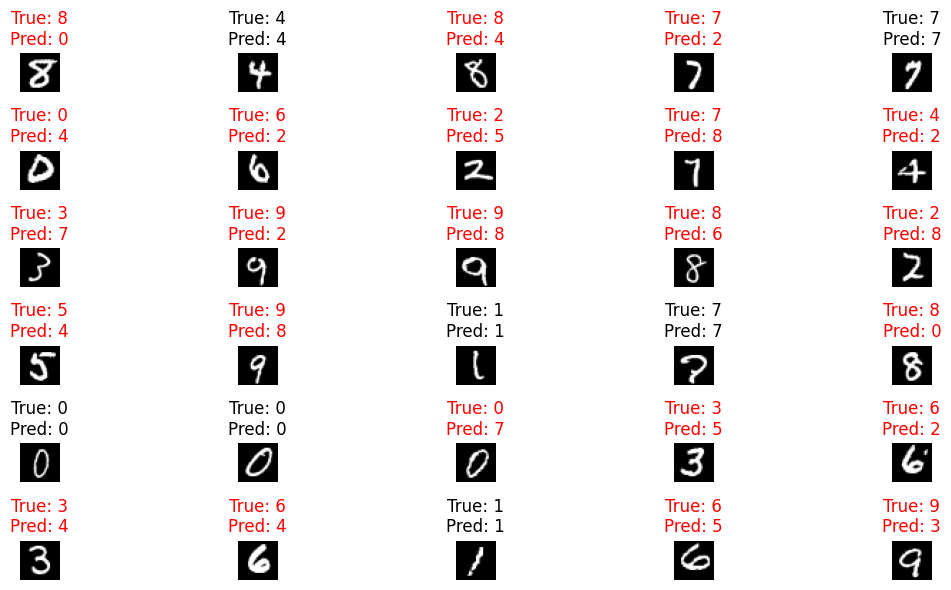

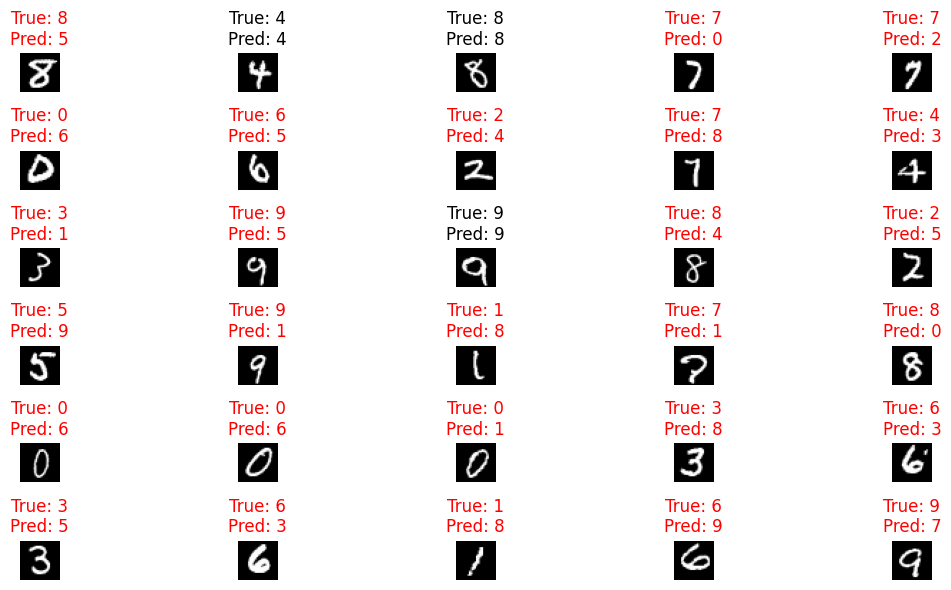

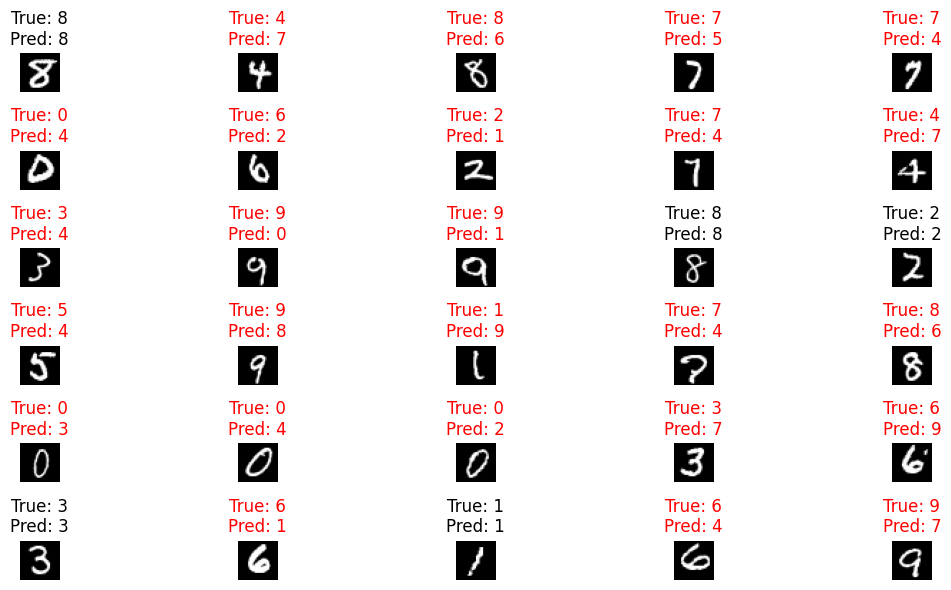

In [58]:
import pandas as pd

# untuk SVM

# Function to create and display visualizations for a given ratio
def display_predictions(X_test_ratio, y_test_ratio, y_pred_svm_ratio, ratio):
    n_samples_to_display = 30  # Adjust the number of samples to display

    plt.figure(figsize=(12, 6))
    for i in range(n_samples_to_display):
        plt.subplot(6, 5, i + 1)

        if i < len(X_test_ratio):  # Check if the index is within the range
            plt.imshow(X_test_ratio[i].reshape(28, 28), cmap="gray")

            true_label = y_test_ratio.iloc[i] if isinstance(y_test_ratio, pd.Series) else y_test_ratio[i]
            pred_label = y_pred_svm_ratio.iloc[i] if isinstance(y_pred_svm_ratio, pd.Series) else y_pred_svm_ratio[i]

            # Determine text color based on true or predicted
            text_color = 'black' if true_label == pred_label else 'red'

            plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
        plt.axis("off")

    plt.tight_layout()
    plt.show()

# Display predictions for different ratios
display_predictions(X_test_70, y_test_70, y_pred_train_SVM_70, 70)
display_predictions(X_test_80, y_test_80, y_pred_train_SVM_80, 80)
display_predictions(X_test_90, y_test_90, y_pred_train_SVM_90, 90)

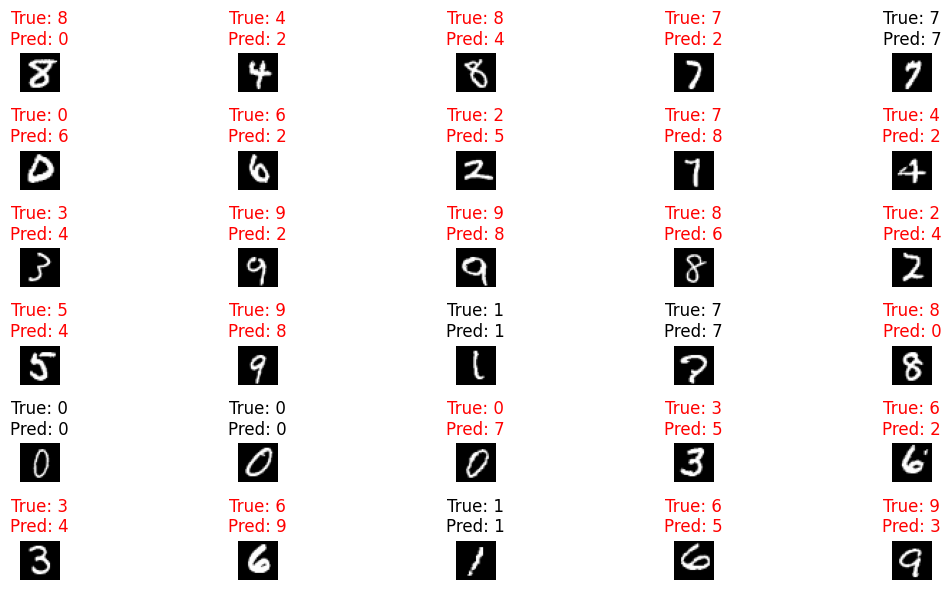

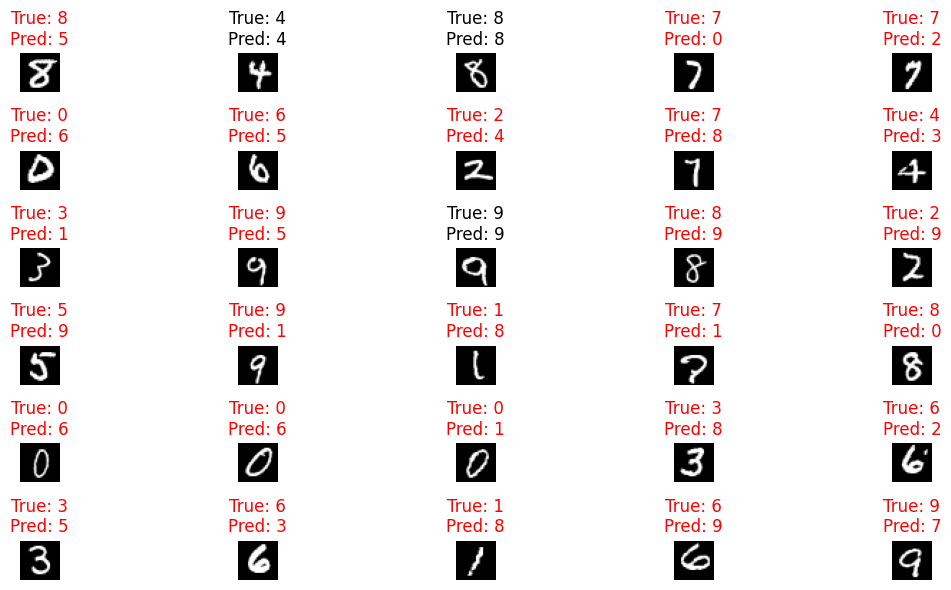

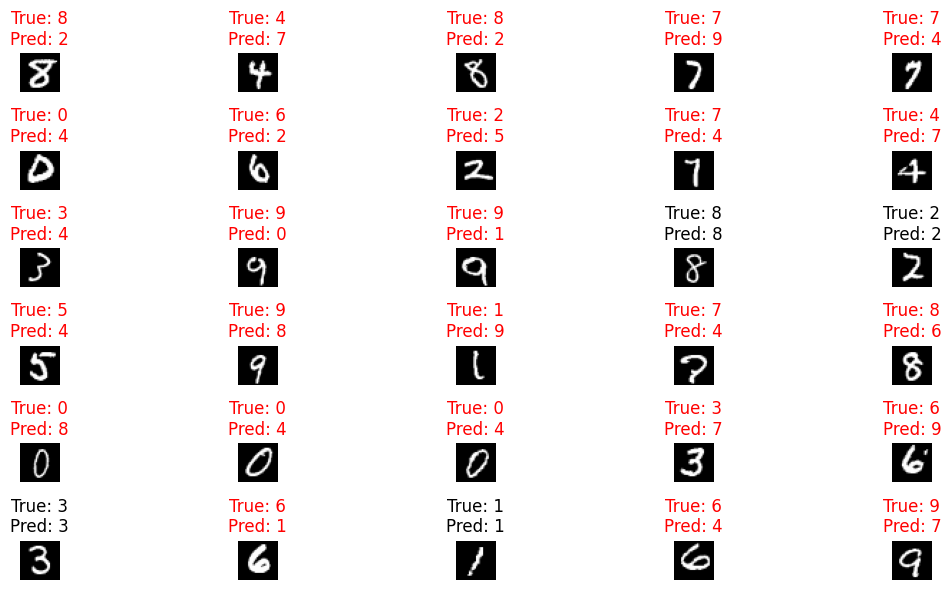

In [59]:
# untuk Naive bayes

import pandas as pd

# untuk SVM

# Function to create and display visualizations for a given ratio
def display_predictions(X_test_ratio, y_test_ratio, y_pred_svm_ratio, ratio):
    n_samples_to_display = 30  # Adjust the number of samples to display

    plt.figure(figsize=(12, 6))
    for i in range(n_samples_to_display):
        plt.subplot(6, 5, i + 1)

        if i < len(X_test_ratio):  # Check if the index is within the range
            plt.imshow(X_test_ratio[i].reshape(28, 28), cmap="gray")

            true_label = y_test_ratio.iloc[i] if isinstance(y_test_ratio, pd.Series) else y_test_ratio[i]
            pred_label = y_pred_svm_ratio.iloc[i] if isinstance(y_pred_svm_ratio, pd.Series) else y_pred_svm_ratio[i]

            # Determine text color based on true or predicted
            text_color = 'black' if true_label == pred_label else 'red'

            plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
        plt.axis("off")

    plt.tight_layout()
    plt.show()

# Display predictions for different ratios
display_predictions(X_test_70, y_test_70, yPredTrainNB1, 70)
display_predictions(X_test_80, y_test_80, yPredTrainNB2, 80)
display_predictions(X_test_90, y_test_90, yPredTrainNB3, 90)

8. Berdasarkan jawaban-jawaban sebelumnya dapat diambil kesimpulan bahwa model yang paling baik jawabannya adalah model SVM